# Opción 2

### En lugar de hacer el método del gradiente, se va a hacer un modelo de regresión lineal simple

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

dataset = pd.read_csv('advertising.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([[<AxesSubplot: title={'center': 'TV'}>,
        <AxesSubplot: title={'center': 'Radio'}>],
       [<AxesSubplot: title={'center': 'Newspaper'}>,
        <AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

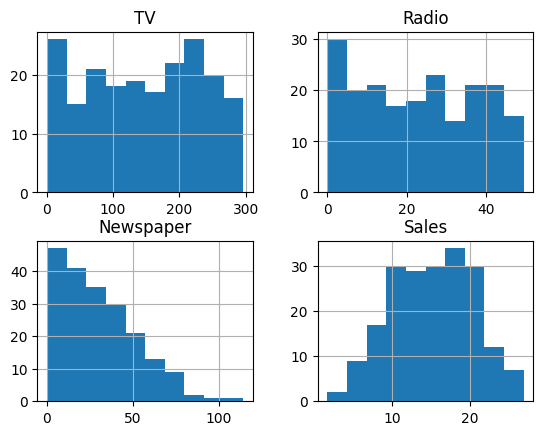

In [2]:
dataset.info()
dataset.hist()

In [3]:
def PlotData(features):
    plt.figure(figsize= (20, 5))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 3 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = dataset, x = mem, y = 'Sales' , color = 'green')
        pltNum += 1
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17304\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\user\AppData\Local\Temp\ipykernel_17304\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\user\AppData\Local\Temp\ipykernel_17304\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they wi

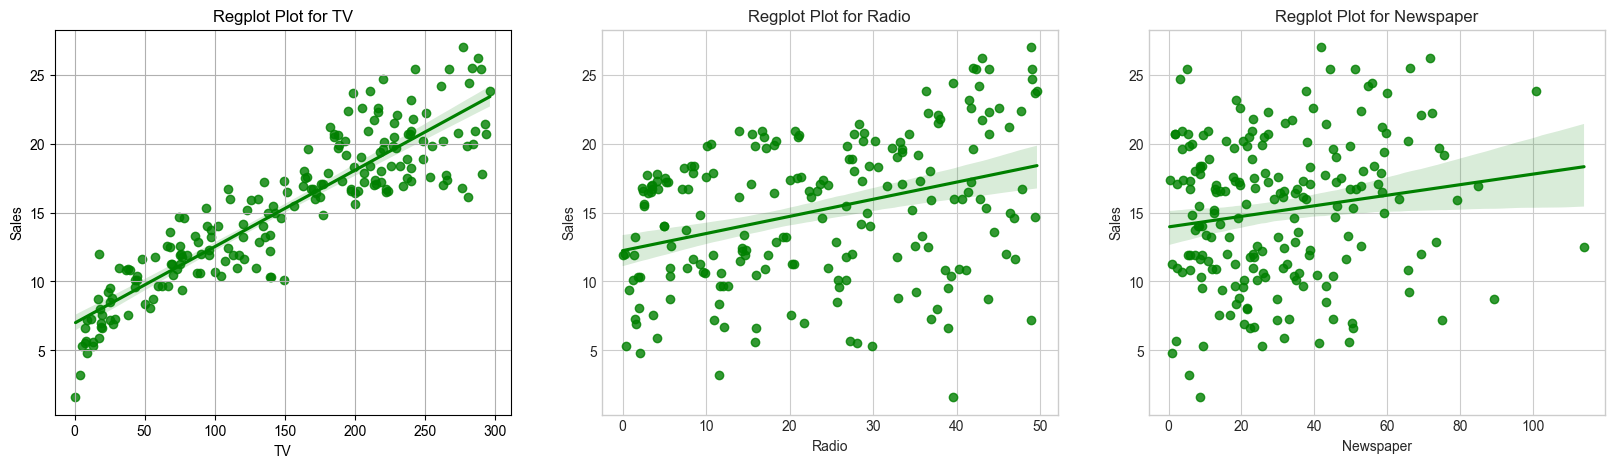

In [4]:
PlotData(['TV', 'Radio', 'Newspaper'])

In [6]:
correlation = dataset.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [5]:
parametros = np.array(dataset[['TV', 'Radio', 'Newspaper']], dtype = 'float32')
sales = np.array(dataset['Sales'], dtype = 'float32')


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(parametros, sales, test_size = 0.2, random_state = 42)
modelo = LinearRegression().fit(x_train, y_train)
print(modelo.score(x_test, y_test))

0.9059011831935805


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
predic = modelo.predict(x_test)
print('Mean squared error (MSE): %.2f' %mean_squared_error(predic, y_test))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, predic))
i = 0
suma = 0
lista_error = []

while i < len(predic):
    lista_error.append((predic[i] - y_test[i])/predic[i])
    i += 1

for a in lista_error:
    suma += a

percentage_error = suma/len(lista_error) * 100
print(f'El error porcentual es: {round(percentage_error,1)} %')

Mean squared error (MSE): 2.91
Coefficient of determination (R^2): 0.91
El error porcentual es: 3.3 %


_NOTA_: tiene menos exactitud

C:\Users\user\AppData\Local\Temp\ipykernel_17304\2823864311.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



[]

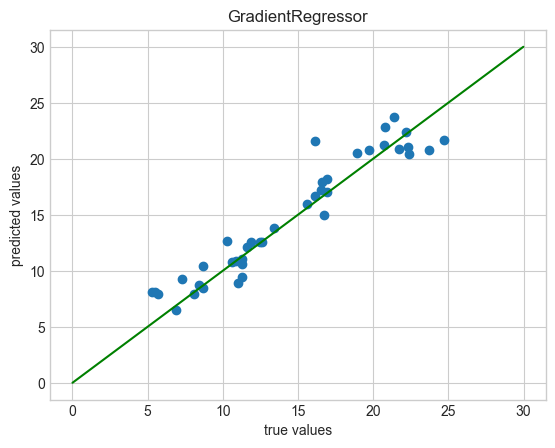

In [18]:
plt.scatter(y_test, predic)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,30, 0.01), np.arange(0, 30, 0.01), color = 'green')
plt.plot(color = 'green')

In [21]:
import future_sales
print(y_test - future_sales.y_test)

ModuleNotFoundError: No module named 'future_sales'